In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Table Content
In this jupyter notebook, we cover following plots:
1. Line Chart
1. Bar Chart (basic, grouped, stacked)
1. Scatter Plot
1. Pie Chart
1. Donut Chart
1. Polar Chart
1. Histogram
1. KDE Plot
1. Dual Axis Charts
1. Autocorrelation
1. Box Plot
1. Violin Plot
1. Heatmap

# Line Chart

In [2]:
df = pd.read_csv('data/iris.csv')
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class,Type
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


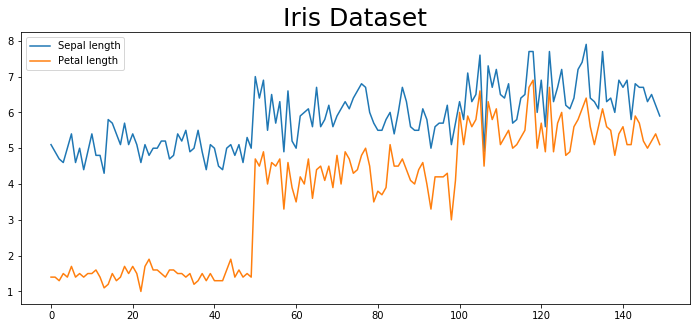

In [3]:
fig, ax = plt.subplots(figsize=(12, 5))
df[['Sepal length', 'Petal length']].plot(ax=ax)
ax.set_title('Iris Dataset', size=25)
plt.show()

# Bar Chart

In [ ]:
# Basic

In [ ]:
# Grouped

In [ ]:
# Stacked

# Scatter Plot

# Pie Chart

# Donut Chart

# Polar Chart

# Histogram

# KDE Plot

# Dual Axis Charts

# Autocorrelation

# Box Plot

# Violin Plot

# Heatmap